In [ ]:
print(X_train.shape)


In [1]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocessing
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape((X_train.shape[0], num_pixels)).astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], num_pixels)).astype('float32') / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

# Build model
model = Sequential()
model.add(Dense(num_pixels, input_dim=num_pixels, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

# Evaluate model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100 - scores[1] * 100))





C:\Users\Deepa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
300/300 - 8s - 26ms/step - accuracy: 0.9229 - loss: 0.2735 - val_accuracy: 0.9574 - val_loss: 0.1400
Epoch 2/10
300/300 - 10s - 33ms/step - accuracy: 0.9683 - loss: 0.1107 - val_accuracy: 0.9712 - val_loss: 0.0921
Epoch 3/10
300/300 - 6s - 19ms/step - accuracy: 0.9788 - loss: 0.0710 - val_accuracy: 0.9756 - val_loss: 0.0816
Epoch 4/10
300/300 - 6s - 20ms/step - accuracy: 0.9853 - loss: 0.0512 - val_accuracy: 0.9779 - val_loss: 0.0683
Epoch 5/10
300/300 - 6s - 20ms/step - accuracy: 0.9891 - loss: 0.0372 - val_accuracy: 0.9777 - val_loss: 0.0685
Epoch 6/10
300/300 - 6s - 20ms/step - accuracy: 0.9925 - loss: 0.0273 - val_accuracy: 0.9808 - val_loss: 0.0613
Epoch 7/10
300/300 - 6s - 20ms/step - accuracy: 0.9952 - loss: 0.0197 - val_accuracy: 0.9802 - val_loss: 0.0620
Epoch 8/10
300/300 - 6s - 19ms/step - accuracy: 0.9960 - loss: 0.0159 - val_accuracy: 0.9803 - val_loss: 0.0649
Epoch 9/10
300/300 - 6s - 20ms/step - accuracy: 0.9976 - loss: 0.0112 - val_accuracy: 0.9811 - val_loss

Enter an index number from 0 to 9999:  66


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


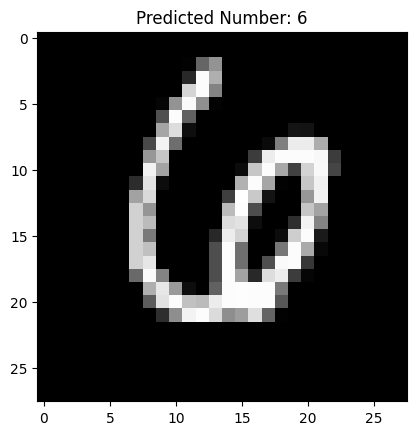

Predicted label for image at index 66: 6


In [2]:
# Prediction and visualization
def predict_digit(index):
    image = X_test[index]
    image = image.reshape(1, 784)

    prediction = model.predict(image)
    predicted_class = np.argmax(prediction)

    plt.imshow(image.reshape(28, 28), cmap='gray')
    plt.title(f"Predicted Number: {predicted_class}")
    plt.show()

    return predicted_class

# User input to test prediction
index = int(input(f"Enter an index number from 0 to {len(X_test) - 1}: "))

if 0 <= index < len(X_test):
    predicted_label = predict_digit(index)
    print(f"Predicted label for image at index {index}: {predicted_label}")
else:
    print("Invalid index. Please enter a valid index number.")
